##### Data Analysis - Coursework 2 (50%)
# Analysing gravitational wave signals
## Deadline Thursday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

I was having trouble uploading the csv files to colab as they were either taking forever to upload or just didnt upload. Therefoire, I have created a public GitHub repository to contain them and call them here.

In [1]:
#Only run omce
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/gravitationalwaveresults.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/Observedwaveform.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/reference_Mtot40Msun_Dist1Mpc.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/mockData_Mtot40Msun_Dist1Mpc.csv
!wget https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/mockData_Mtot70Msun_Dist5Mpc.csv

--2023-12-14 09:23:03--  https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/gravitationalwaveresults.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857 (1.8K) [text/plain]
Saving to: ‘gravitationalwaveresults.csv’

gravitationalwavere 100%[===================>]   1.81K  --.-KB/s    in 0s      

2023-12-14 09:23:04 (20.6 MB/s) - ‘gravitationalwaveresults.csv’ saved [1857/1857]

--2023-12-14 09:23:04--  https://raw.githubusercontent.com/Huw-Riley/Data_Analysis23/main/Observedwaveform.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

%matplotlib inline

## Part A - Some background [15 marks]

**Answer:**

### (1)

Astronomers know that the gravitational wave signal from the GW150914 event was due to two black holes merging. They proved this in the paper[
The basic physics of the binary black hole merger GW150914](https://arxiv.org/pdf/1608.01940.pdf). At first they assumed the masses were equal. They found the mass of each unknown object to be $35{M}_\odot$. Due to the high nature of the Mass there are few objects the merging bodies could take the form of. Below are 3 papers that give different upper limits for the mass of Neutron Stars. The first two$^{[1][2]}$ give mass limits of $3.2{M}_\odot$ and the last one$^{[3]}$ gives a mass limit of $2.9{M}_\odot$. This gives an average mass of approximately $3.1{M}_\odot$. Since $35{M}_\odot>3.1{M}_\odot$ we can say that for a mass ratio q of 1 the objects must be Black Holes. The next case is unequal masses. [They](https://arxiv.org/pdf/1608.01940.pdf) found in the above link that a mass ratio of $q=13$ is the hard limit for the system because any higher and the Schwarzschild radius of the objects will be inside the Schwarzschild radius of the other. This limit of $q=13$ means the smaller object would have a mass of $11{M}_\odot$. Since $11{M}_\odot>3.1{M}_\odot$ the two bodies must be Black Holes in this Scenario too. The last case takes spinning objects. [They](https://arxiv.org/pdf/1608.01940.pdf) found the upper limit of the mass ratio to be 83. This gives a limit to the lower mass object of $5{M}_\odot$. Since $5{M}_\odot>3.1{M}_\odot$ the objects in this case are also Black Holes. To summarise since the Masses are greater than the upper limit of a Neutron Star the objects must be Black Holes.

[1] C. E. Rhoades Jr, and R. Ruffini, Phys. Rev. Lett. 32,
324–327 (1974).

[2] M. Hannam, D. A. Brown, S. Fairhurst, C. L. Fryer, and
I. W. Harry, Astrophys. J. 766, L14 (2013).

[3] V. Kalogera and G. Baym, Astrophys. J. 470, L61–L64
(1996).

### (2)
The Waveform of a Gravitational Wave has 3 parts. Before the Black Hole merger, The Black Hole merger and after the Black Hole merger. Before the Black Hole merger, also known as the in-spiral phase, there are two Black Holes at a certain distance apart from one another. They have become gravitationally bound somehow and due to this they begin falling towards each other. Because they are likely to have some velocity through spacetime they have angular momentum. This is a comserved quantity. As they fall towards each other they begin to orbit around each other. r decrease due to the gravitational attraction and since $L=mrv$, the velocity must increase to keep Angular momentum constant (assuming mass is constant). This can be seen on the waveform because at more negative times in figure 2 the longer the period is. This increase in orbital velocity causes gravitational waves that warp spacetime. They can be observed on Earth by using Michelson interferometers that measure the difference in phase between two laser beams. This allows us to calculate a strain represented on the waveform as amplitude. This strain increases as the two Black Holes seperation decreases. At the merger event, also known as the chirp, the stored up energy is dissipated in one large gravitational wave, hence the peak in amplitude at $t=0$ (and just after merger time also). After the merger event is split into two sections. The ringdown, is the small amount of time after the merge event where the Black Hole goes from an unstable state to a stable one. This shift (Wobble) creates gravitational waves. After the ringdown, there are no more Gravitational waves and what we see in Figure 2 is Background noise from something else.

### (3)

In [3]:
GR = pd.read_csv('gravitationalwaveresults.csv') # reading in file using pandas

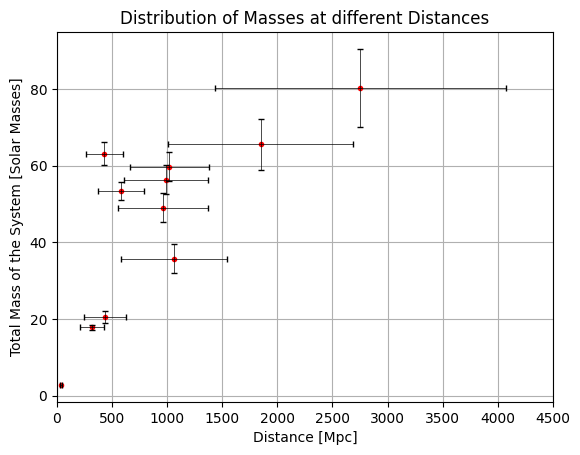

Figure 1


In [4]:
plt.figure(1)
plt.plot(GR['DL'], GR['Mtot'], 'ro', markersize = "3") # Plotting the observed merger events masses against distance
plt.errorbar(GR['DL'], GR['Mtot'], xerr=GR['DL_err'], yerr=GR['Mtot_err'], ls='None', ecolor='k', elinewidth=0.5, capsize=2, capthick=1) # Plotting errorbars
plt.xlabel('Distance [Mpc]') # Plots x label
plt.ylabel('Total Mass of the System [Solar Masses]') # plots y label
plt.title('Distribution of Masses at different Distances') # plots the title
plt.xlim(0, 4500) # Becuase the errorbars force the graph to be wider than needed
plt.grid() # plots a grid
plt.show() # guves an output of the graph as shown below
print("Figure 1") # Denotes the figure thats been plotted

There appears to be a correlation in the data above. This however is a naive assumption. There is observation bias in Figure 1 because when a signal is received from farther away, we only see the more massive mergers. This is due to the fact that we do not have the sensitivity to see the smaller mergers at large distances.

***

## Part B - The data [15 marks]

**Answer:**

### (1)

In [5]:
OW = pd.read_csv('Observedwaveform.csv') # reading in file using pandas

### (2)

GPS time is very similar to Julian Dates. It represents the amount of time since midnight on January $6^{th}$ 1980. One simply subtracts the amount of time since then to get time in the units you desire.

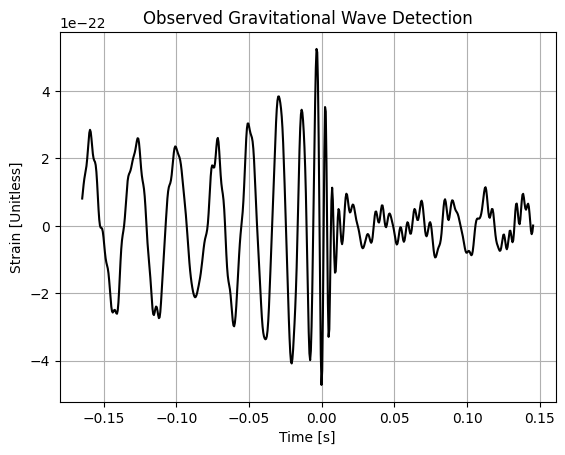

Figure 2


In [6]:
# below the values are extracted from the file read in above. square brackets are used to get the data from the columns we want ['time (s)'] denotes the column titled 'time (s)'
O_time = np.array(OW['time (s)']) - 1205951542.15336#seconds from the start of GPS time to merger event. # Correcting for GPS time
O_strain = np.array(OW['strain']) # unitless (remember from Youngs modulus)

plt.figure(2)
plt.plot(O_time, O_strain, 'k-') # plotting Observed strain against time in seconds
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title('Observed Gravitational Wave Detection')
plt.grid()
plt.show()
print("Figure 2")

### (3)

The merger event happens at $t=0$. There is still data from the gravitational wave for a small fraction of time after the merger event (ringdown). I estimate that at around 0.015 seconds after the Black Holes nerge the Signal from the merger is 0. i.e there should be a strain of 0. Since we still have strain, it must be due to noise.

In [7]:
sel = O_time > 0.015 # Taking data only after time 0.015s
Noise = O_strain[sel] # Applying this selection to strain
t_red = O_time[sel] # Applying this selection to time

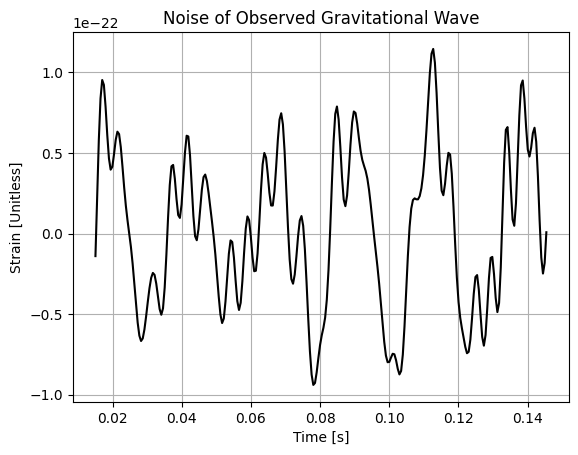

Figure 3


In [8]:
plt.figure(3)
plt.plot(t_red, Noise, 'k-') # Plotting Only the Noise of the Observed GW
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Noise of Observed Gravitational Wave")
plt.grid()
plt.show()
print("Figure 3")

In [9]:
mu_N = np.mean(Noise)
sigma_N = np.std(Noise)

print('The mean Noise of the Observed GW is {:.2e} unitless'.format(mu_N))
print("The standard deviation of the Noise for the Observed GW is {:.2e} unitless".format(sigma_N))

The mean Noise of the Observed GW is 3.70e-24 unitless
The standard deviation of the Noise for the Observed GW is 4.85e-23 unitless


Noise can be considered a random natural event. Natural events are known to follow normal distributions, like the lengths of tree branches on a tree. I will plot below a normal distribution for the mean and standard deviation as shown above to test this.

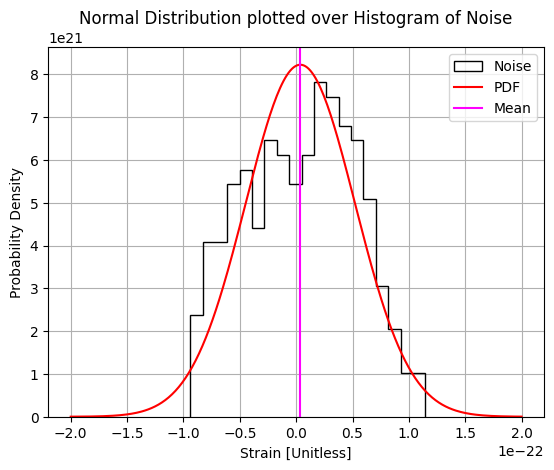

Figure 4


In [10]:
rang = np.linspace(-2E-22, 2E-22, len(Noise)) # linspace for x coords of normal distribution
p = stats.norm.pdf(rang, mu_N, sigma_N) # PDF for Noise (assumption)

plt.figure(4)
plt.hist(Noise, bins=19, density=True, histtype='step', color='black', label='Noise') # Noise Data plotted as a histogram
plt.plot(rang, p, 'r-', label='PDF') # PDF Assumption
plt.xlabel('Strain [Unitless]')
plt.ylabel('Probability Density')
plt.title("Normal Distribution plotted over Histogram of Noise")
plt.axvline(mu_N, color='magenta', label='Mean') # plots a vertical line spanning the y axis at mu_N
plt.legend(loc='best') #  plots a legend from the labels given in the plt.plots
plt.grid()
plt.show()
print("Figure 4")

The PDF in Figure 4 above visually fits the Noise quite well. It is because of that that I will assume the Noise takes the form of a Normal distribution so that the standard deviation can be described as an error in the mean:

$$\mu\pm\sigma$$

(This is important for the MCMC later)

In [11]:
print('The mean Noise of the Observed GW is {:.2e} +/- {:.2e} unitless'.format(mu_N, sigma_N))

The mean Noise of the Observed GW is 3.70e-24 +/- 4.85e-23 unitless


Below I have attempted to fit a curve to the noise in hopes of being able to subtract it off. It has not worked well. To improve i would need to include more Sinusoids in my Fourier Transforms.

I have plotted a Power Spectrum Densioty graph with a logged y-axis in Figure 5a. This is less pretty so to the right of it i have also plotted the normal unlogged version in Figure 5b. The logged version is the more usefuk one though.

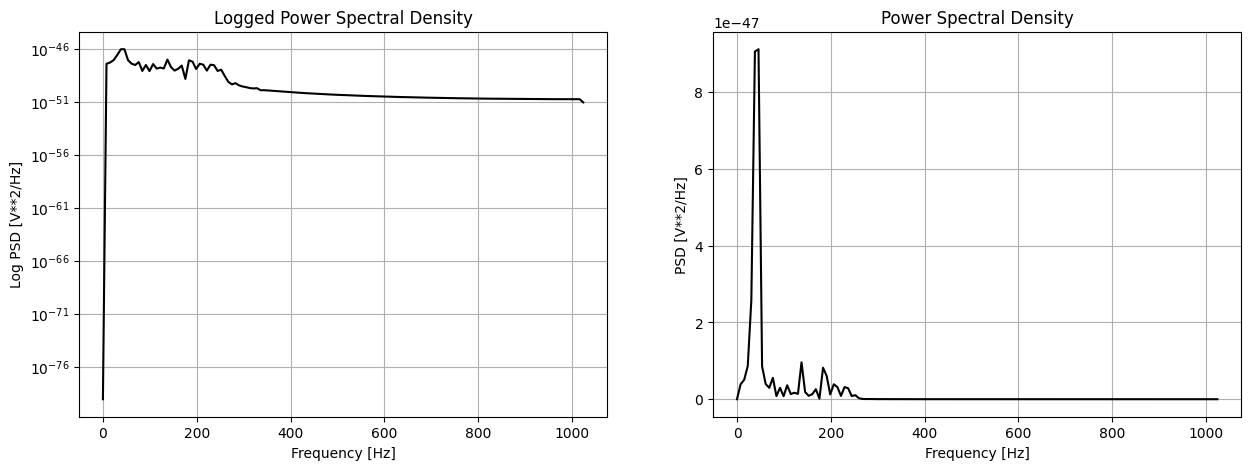

Figure 5a ann Figure 5b


In [12]:
fs = 1 / (t_red[1] - t_red[0]) # Converting reduced time to frequencies
f, Psd = signal.periodogram(Noise, fs) # Using scipy.signal to plot the peaks at given frequencies

fig5, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.semilogy(f, Psd, 'k-') # Plotting the Power Spectrum Density Graph in log form
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Log PSD [V**2/Hz]')
ax1.set_title("Logged Power Spectral Density")
ax1.grid()

ax2.plot(f, Psd, 'k-') # Plotting the Power Spectrum Density Graph
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('PSD [V**2/Hz]')
ax2.set_title("Power Spectral Density")
ax2.grid()
plt.show()
print("Figure 5a ann Figure 5b")

Using the fact that the peaks of the above gaph correspond to the frequencies of the sine waves that make up the fourier transform. I created a function that adds these sine waves together and used curve fit with some guesses that included the frequencies of above peaks to fit the data.

In [13]:
def Sinusoid(t, w1, A1, phi1, w2, A2, phi2, w3, A3, phi3, w4, A4, phi4, w5, A5, phi5, c): # Fourier Transform
    S1 = A1*np.cos(w1*t + phi1) # These are the Sine waves that make up the fit at the end
    S2 = A2*np.cos(w2*t + phi2)
    S3 = A3*np.cos(w3*t + phi3)
    S4 = A4*np.cos(w4*t + phi4)
    S5 = A5*np.cos(w5*t + phi5)
    return S1 + S2 + S3 + S4 + S5 + c # returns the addition of the above waves
# Need more waves to make a better fit

p_init = np.array([42, 2.5E-22, 1, 138, 1E-23, 1, 183, 1E-22, 1, 1000, 1E-23, 1, 300, 1E-22, 1, 1]) # Initial guesses from the PSD and Noise Graph
popt, pcov = curve_fit(f=Sinusoid, xdata=t_red, ydata=Noise, p0=p_init) # Gives optimal values as well as the covarience

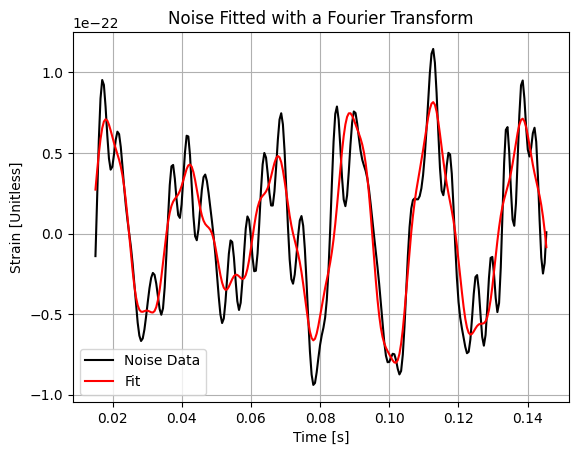

Figure 6


In [14]:
plt.figure(6)
plt.plot(t_red, Noise, 'k-', label='Noise Data') # Observed Noise
plt.plot(t_red, Sinusoid(t_red, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11], popt[12], popt[13], popt[14], popt[15]), 'r', label='Fit') # Plotted fit curve
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Noise Fitted with a Fourier Transform")
plt.legend(loc='best')
plt.grid()
plt.show()
print("Figure 6")

In Figure 6 above, the fit of 5 sine waves is plotted over the original data. It has begun to fit the data quite nicely, obviously not perfectly. This is because I have not used enough sine waves to account for all the waves that make up the GW observation. I estimate that 9 will be sufficient to fit the well enough to reduce the noise to zero.

In [15]:
#Attempted Noise Subtraction
noise = Sinusoid(O_time, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9], popt[10], popt[11], popt[12], popt[13], popt[14], popt[15]) #estimated array of strain noises
Signal = O_strain - noise # subtraction of noise from observed data

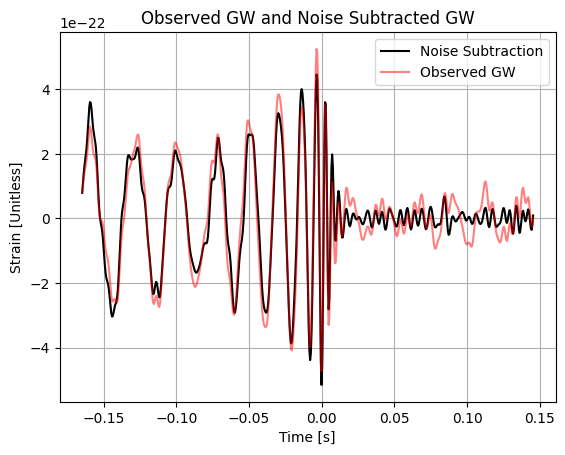

Figure 7


In [16]:
plt.figure(7)
plt.plot(O_time, Signal, 'k-', label='Noise Subtraction') # Noise Subtraction
plt.plot(O_time, O_strain, 'r-', label='Observed GW', alpha=0.5) # Observed Data
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Observed GW and Noise Subtracted GW")
plt.legend(loc='best')
plt.grid()
plt.show()
print("Figure 7")

The noise subtraction for the whole graph can be seen in black. It has clearly not reduced the signal after 0.015s to 0. This means the noise subtraction has not worked. Assuming this noise is constant over the whole observation we have subtracted the noise from the whole graph in Figure 7. It can be seen that the noise does affect the strain of the GW detection. Doing this correction would impact the results from the MCMC.

***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

**Answer:**

Belows makes up part of questions 1 and 2 for C. It accounts for calling in the data

In [17]:
mockdata70_5 = pd.read_csv("mockData_Mtot70Msun_Dist5Mpc.csv") # reading in file using pandas
mockdata = pd.read_csv("mockData_Mtot40Msun_Dist1Mpc.csv") # reading in file using pandas
refdata = pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv') # reading in file using pandas

# each file only has 2 columns
m_strain = mockdata['strain'] # extracting the data from the column desired
m_time = mockdata['time (s)']
r_strain = refdata['strain']
r_time = refdata['time (s)']
m_strain70_5 = mockdata70_5['strain']
m_time70_5 = mockdata70_5['time (s)']

### (1)

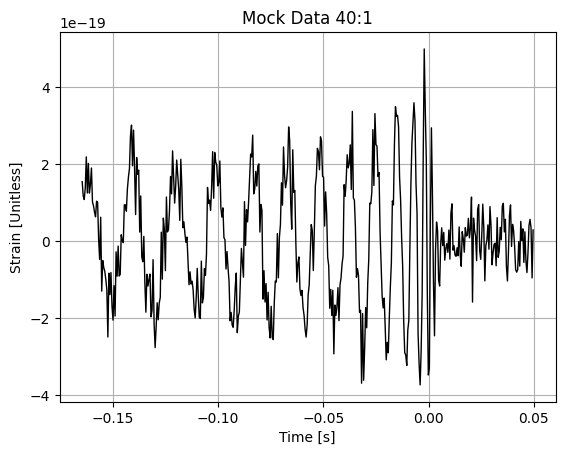

Figure 8


In [18]:
plt.figure(8)
plt.plot(m_time, m_strain, 'k-', lw=1) # Plotting the 40 solar mass 1Mpc mock data
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Mock Data 40:1")
plt.grid()
plt.show()
print("Figure 8")

Important to note that even mock data will have ringdown, this means that the mock data has signal after $t=0$ seconds. Through trial and error i have found that roughly the ringdown ends at 0.005 seconds after the merger.

In [19]:
m_t0 = m_time[m_time <= 0.005] # selects the data in m_time for which the components are less than 0.005
m_h0 = m_strain[m_time <= 0.005]# selects the data in m_strain for which the components are less than 0.005

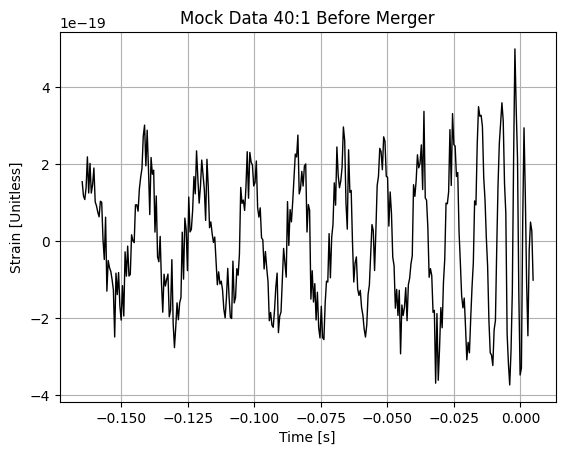

Figure 9


In [20]:
plt.figure(9)
plt.plot(m_t0, m_h0, 'k-', lw=1) # Plotting the 40 Solar mass 1Mpc mock data before the merger event at t=0
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Mock Data 40:1 Before Merger")
plt.grid()
plt.show()
print("Figure 9")

In [21]:
t_min = m_t0[0] # first component of the array for time in the minimum time
print("The mimimum time of the mock data is {:.2f} seconds but I will use the exact form".format(t_min), t_min, "seconds")

The mimimum time of the mock data is -0.16 seconds but I will use the exact form -0.1646575927734375 seconds


### (2)

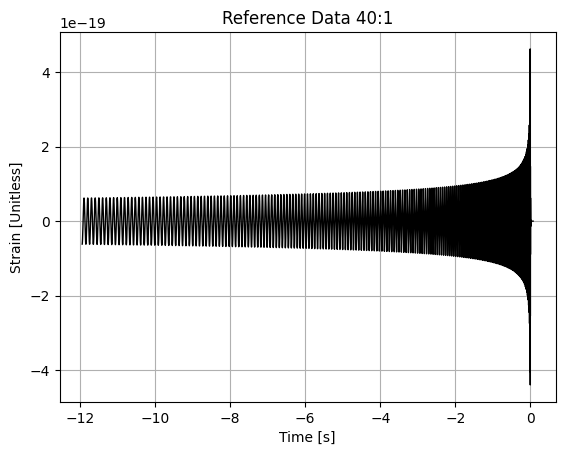

Figure 10


In [22]:
plt.figure(10)
plt.plot(r_time, r_strain, 'k-', lw = 1) # plotting the reference data for 40 solar masses and
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Reference Data 40:1")
plt.grid()
plt.show()
print("Figure 10")

The Models for Mock 40:1 and Reference 40:1 have the same masses and distances. The main difference between them is the time steps between data. The strain data is known for different times. To compare a model to data correctly it must be interpolated so that the time arrays are the same for the mock and reference data.

The interp1d function takes in x and y data and gives a function that can interpolate between the arrays you give it. You can then project this function onto other data to get the y data for other x data. This should output an array of y data with the same length as the other x data. This will likely be smnaller than the original length of the reference data.

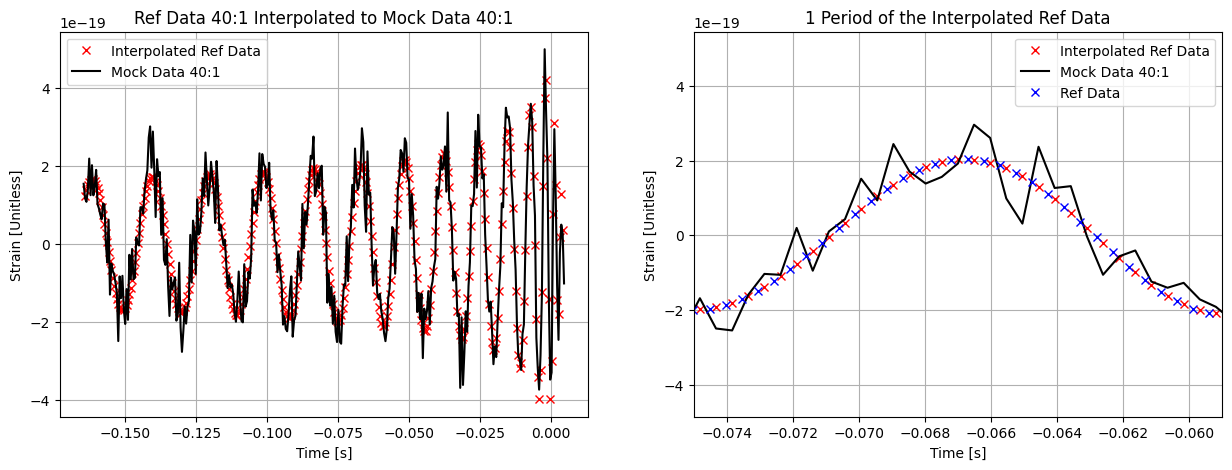

Figure 11a and Figure 11b


In [23]:
indx = r_time > t_min #(-0.1646575927734375) selection for reference time less that t_min
r_t_crp = r_time[indx]
r_h_crp = r_strain[indx]
indx2 = r_t_crp <= 0.005 # ringdown so 0 has not been used
r_t_red = r_t_crp[indx2]
r_h_red = r_h_crp[indx2]

f = interp1d(r_t_red, r_h_red, bounds_error=False) # interpolation of reference data
interp_strain = f(m_t0) # projection onto the mock time

fig11, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(m_t0, interp_strain, 'rx', label='Interpolated Ref Data')
ax1.plot(m_t0, m_h0, 'k-', label='Mock Data 40:1')
#ref data not plotted ass it would make Figure 11a unreadable.
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Strain [Unitless]')
ax1.set_title("Ref Data 40:1 Interpolated to Mock Data 40:1")
ax1.legend(loc='best')
ax1.grid()

ax2.plot(m_t0, interp_strain, 'rx', label='Interpolated Ref Data')
ax2.plot(m_t0, m_h0, 'k-', label='Mock Data 40:1')
plt.plot(r_time, r_strain, 'bx', label='Ref Data')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Strain [Unitless]')
ax2.set_title("1 Period of the Interpolated Ref Data")
ax2.legend(loc='best')
ax2.set_xlim(-0.075, -0.059) # sets limits for the plot of the x axis
ax2.grid()
plt.show()
print("Figure 11a and Figure 11b")

In [24]:
print("The length of the interpolated reference strain data is {:.0f} compared to the length of the reference strain which is {:.0f}".format(len(interp_strain), len(r_strain)))
print("The length of the strain of the mock data(40:1) below t=0 is {:.0f}".format(len(m_h0)))

The length of the interpolated reference strain data is 348 compared to the length of the reference strain which is 24622
The length of the strain of the mock data(40:1) below t=0 is 348


The reference data, which has the same scale as this mock data (40:1), does not need to be scaled. The reference data has only been interpolated. This interpolation can be seen in Figure 11a. To check this interpolation has been completed correctly i have printed the length of the interpolated reference strain and compared it to the original length of the reference data. The length has decreased by 24274, a decrease was expected. I then compared it to the length of the mock strain(40:1). I found the length of the mock strain(40:1) to be 348, this matches the length of the interpolated reference strain(40:1). The fact that these lengths match is one indicator that the interpolation has worked. One of the other ways of testing this is to plot a small section of the graph, like what i have done for Figure 11b. If you look at a local peak of the mock data you can see that the time of that strain matches perfectly to the time of the corresponding strain on for the red cross on the reference data. You can plot a vertical line between a red cross and the black line and the points match up. This matching is the final piece of evidence to prove that the interpolation has worked. You can see that the blue crosses in Figure 11b are at different time steps to the interpolated data.

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

**Answer**

### (1)

We want to be able to scale and interpolate our reference data for any gravitational wave signal so I have made a function that can do this.

$q=1$ so the masses of the system are equal. We will treat mass from here on as the total mass of the system $M$ until it is dived by 2 to get $M_1$ and $M_2$. Doing this allows us to Scale the strain in the following way

Equation 1:
$$t_{\rm{ref}}=\left(\dfrac{M_{\rm{ref}}}{M}\right)t$$

Where $M_{ref}$ is the total mass of the merging Black Holes for the reference data which is $40M_\odot$ for the reference data. $M$ here is the total mass you want to scale it to ($70M_\odot$).

Equation 2:
$$h(t,M,D)=\left(\dfrac{M}{M_{\rm{ref}}}\right)\left(\dfrac{D_{\rm{ref}}}{D}\right)h(t_{\rm {ref}})$$

Where $M_{ref}$ and $M$ are the same as in Equation 1. $D_{ref}$ is the distance to the reference merger which is $1Mpc$. D is the distance we want to scale it to ($5Mpc$). The $h(t_{ref})$ is the interpolated strain for the scaled time $t_{ref}$. Interp1d will be used to find the function that allows interpolation for any time data ($t_{ref}$). The fractions in Equation 2 do the scaling and the $h(t_{ref})$ does the interpolation.

In the cell below I have defined a function that takes in a given mass and distance to scale to. It also takes in the array of time and strain of your reference data (The data you want to scale and interpolate). Finally it also takes in the array of time that the data will be interpolated and scaled for.

In [25]:
def GW_merg_param(M, D, t_data, t_r, h_r): # defined function to scale and interpolate.
  M_ref = 40 #Solar Masses
  D_ref = 1 #Mpc
  t_mscaled = (M_ref / M) * t_data # equation 1
  func = interp1d(t_r, h_r, bounds_error=False) # creating a function of the reference data that is ready to be projected on any other time array
  h_scaled = (M / M_ref) * (D_ref / D) * func(t_mscaled) # equation 2
  return t_data, h_scaled # returns the new strain and the time is unchanged

### (2)

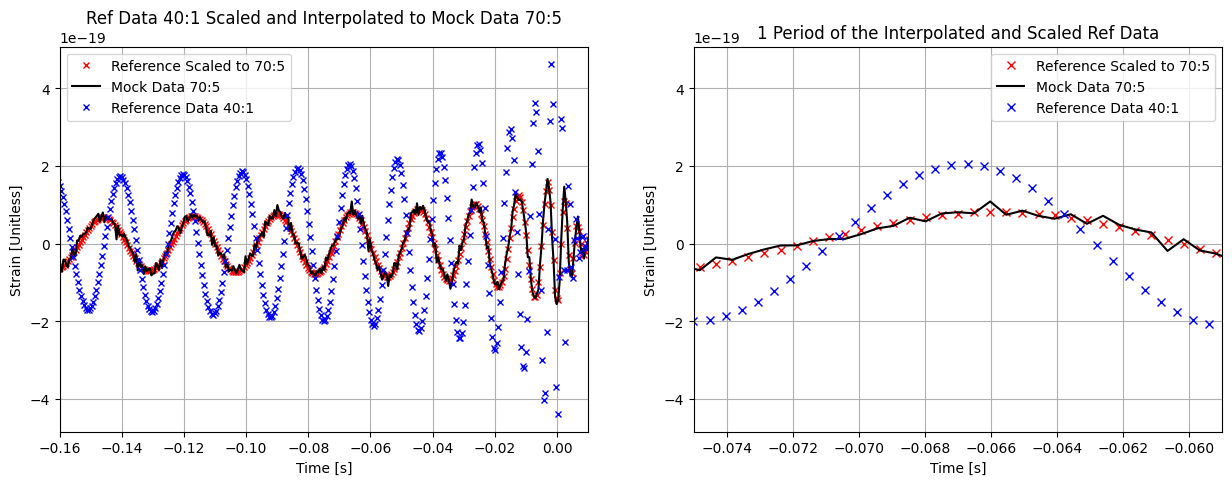

Figure 12a and Figure 12b


In [26]:
a = GW_merg_param(70, 5, m_time70_5, r_time, r_strain) # function being used for the (70:5) mock data
r_time70_5 = a[0] # t_data from the function (same as time as inputted)
r_strain70_5 = a[1] # h_scaled is the scaled and interpolated strain

fig12, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(r_time70_5, r_strain70_5, 'rx', ms=4, label='Reference Scaled to 70:5')
ax1.plot(m_time70_5, m_strain70_5, 'k-', label='Mock Data 70:5')
ax1.plot(r_time, r_strain, 'bx', ms=4, label='Reference Data 40:1')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Strain [Unitless]')
ax1.set_title("Ref Data 40:1 Scaled and Interpolated to Mock Data 70:5")
ax1.legend(loc='best')
ax1.set_xlim(-0.16, 0.01)
ax1.grid()

ax2.plot(a[0], a[1], 'rx', label='Reference Scaled to 70:5')
ax2.plot(m_time70_5, m_strain70_5, 'k-', label='Mock Data 70:5')
ax2.plot(r_time, r_strain, 'bx', label='Reference Data 40:1')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Strain [Unitless]')
ax2.set_title("1 Period of the Interpolated and Scaled Ref Data")
ax2.legend(loc='best')
ax2.set_xlim(-0.075, -0.059) # allows us to see one period of the data
ax2.grid()
plt.show()
print("Figure 12a and Figure 12b")

In [27]:
print("The length of the interpolated and scaled reference strain data is {:.0f} compared to the length of the reference strain which is {:.0f}".format(len(a[1]), len(r_strain)))
print("The length of the strain of the mock data(70:5) below t=0 is {:.0f}".format(len(m_strain70_5)))

The length of the interpolated and scaled reference strain data is 440 compared to the length of the reference strain which is 24622
The length of the strain of the mock data(70:5) below t=0 is 440


The reference data has been scaled and interpolated for the mock data(70:5). This interpolation can be seen in Figure 12a. To check this interpolation has been completed correctly I have printed the length of the interpolated reference strain and compared it to the original length of the reference data. The length has decreased by 24182, a decrease was expected. I then compared it to the length of the mock strain(70:5). I found the length of the mock strain(70:5) to be 440, this matches the length of the scaled and interpolated reference strain(70:5). The fact that these lengths match is one indicator that the scaling and interpolation has worked. One of the other ways of testing this is to plot a small section of the graph, like what I have done for Figure 12b. If you look at the peak of the mock data(70:5) at -0.066. You can see that the time of the red cross matches that of the black line peak. This is proof of interpolation. This matching is the final piece of evidence shows that the interpolation has worked. The fact that the red cross fit the black line so well shows the scaling has worked. You can clearly see that the blue crosses are at different time steps to the red crosses in Figure 12b.

### (3)

Different values of mass and distance were tested in the GW_merg_param function and the interpolated and scaled outputs of obs were plotted in Figure 13. I found the best mass to be 77 but I have used 76 here because we want our MCMC to noticeably converge in Part E. I also found the best distance was 1710 but have used 1690 so i can noticeably see the MCMC converge.

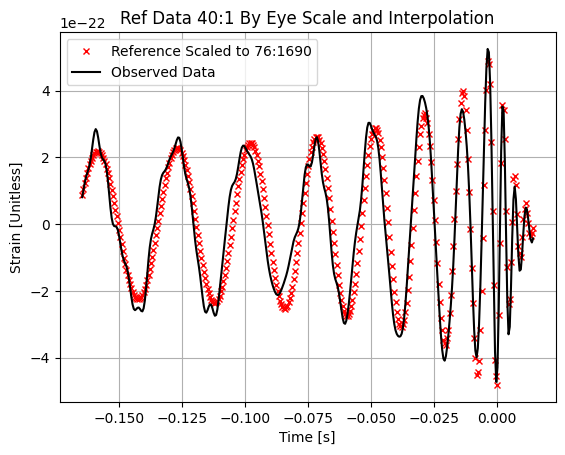

Figure 13


In [28]:
obs = GW_merg_param(76, 1690, O_time[O_time < 0.015], r_time, r_strain)

plt.figure(13)
plt.plot(obs[0], obs[1], 'rx', ms=5, label='Reference Scaled to 76:1690')
plt.plot(O_time[O_time < 0.015], O_strain[O_time < 0.015], 'k-', label='Observed Data')
plt.xlabel('Time [s]')
plt.ylabel('Strain [Unitless]')
plt.title("Ref Data 40:1 By Eye Scale and Interpolation")
plt.legend(loc='best')
plt.grid()
plt.show()
print("Figure 13")

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

### (1) Option 2

Bayes Theorem is used in MCMCs' to test to see if the probability of a best fit parameter is larger than the probability of a proposed value of that best fit parameter

Equation 3:
$$P(\theta|D)=\dfrac{P(D|\theta)P(\theta)}{P(D)}$$

$P(\theta|D)$: the posterior

$P(D|\theta)$: the likelihood

$P(\theta)$: the prior

$P(D)$: the evidence



We are trying to find best fit values for the observed GW data. A chi-square distribution can be used to estimate the best-fit parameters from an MCMC. The likelihood

 Equation 4:
 $$\mbox{log(likelihood)}=-0.5\dfrac{\sum(y_i-y_{\rm model})^2}{\sigma^2}$$

 Where $y_i$ is the strain of the observed data and $y_{data}$ is the

We ignore the evidence term in Bayes Theorem as it is just a normalisation term therefore the posterior is equal to

Equation 5:
$$P(log(posterior))=-0.5\dfrac{\sum(y_i-y_{\rm model})^2}{\sigma^2}P(Prior)$$

The Prior

In [29]:
steps = 100000 # number of steps
th_c_M = np.zeros(steps + 1) # length of output mass array
th_c_M[0] = 76 # initial guess from by eye fit for mass
stp_siz_M = 0.1 # max step size of the mass mcmc
th_c_D = np.zeros(steps + 1) # length of output distance array
th_c_D[0] = 1690 # initial guess from by eye fit for distance
stp_siz_D = 50 # max step size of the distance mcmc

O_t_red = O_time[O_time < 0] # observed time before merger
O_h_red = O_strain[O_time < 0] # observed strain before merger

In [30]:
def functional_form(t_m, M, D, t_r, h_r): # same as GW_merg_param but outputs the function of scaled and interpolated strain instead
    M_ref = 40 #Solar Masses
    D_ref = 1 #Mpc
    t_mscaled = (M_ref / M) * t_m
    func = interp1d(t_r, h_r, bounds_error=False)
    return (M / M_ref) * (D_ref / D) * func(t_mscaled)

In [31]:
def log_lik(M, D):
    Noise = sigma_N
    log_l = -0.5*np.sum((O_h_red - functional_form(O_t_red, M, D, r_time, r_strain))**2) / Noise**2
    return log_l

In [32]:
def posterior(M, D):
    prior = 1 # uniform prior
    pos = log_lik(M, D) * prior # P(D|theta) * P(theta) # P(D)
    return pos

In [33]:
for i in range(steps): # repeated the number of steps times
    pos_c = posterior(th_c_M[i], th_c_D[i]) # calculates the log posterior probabilityfor every value of mass and distance inputted
    d_th_M = np.random.normal(0, stp_siz_M) # Draws psuedo random samples from a normal distribution for Mass step size
    d_th_D = np.random.normal(0, stp_siz_D) # Draws psuedo random samples from a normal distribution for Distance step size
    th_prop_M = th_c_M[i] + d_th_M # proposed Mass is the previous one plus this psuedo random step between 0 and 0.1
    th_prop_D = th_c_D[i] + d_th_D # proposed Distance is the previous one plus this psuedo random step between 0 and 50
    pos_prop = posterior(th_prop_M, th_prop_D) # proposed posterior probability
    # test to see if the propsed log posterior probability is accepted
    if pos_prop > pos_c: # test 1 compare proposed log posterior to current log posterior probability
        th_c_M[i + 1] = th_prop_M # if true accept the proposed mass
        th_c_D[i + 1] = th_prop_D # if true accept the proposed distance
    else: # if test 1 fails
        p_nu_stp = pos_prop - pos_c # normally we divide to make a value less than 1 here # both log so subtract not divide
        tru_pos = np.exp(p_nu_stp) # convert ln(posterior) to posterior
        rand = np.random.uniform(0, 1) # picks a psuedo random number between 0 and 1
        if rand <= tru_pos: # test 2 # compare to actual posterior here to the number between 0 and 1 above
            th_c_M[i + 1] = th_prop_M # if true accept the proposed mass
            th_c_D[i + 1] = th_prop_D # if true accept the proposed distance
        else: # if test 2 fails
            th_c_M[i + 1] = th_c_M[i] # mass does not change
            th_c_D[i + 1] = th_c_D[i] # distance does not change
            # If this happens every time then themcmc will never converge

Only source pf error we have is Noise

In [34]:
mu_stps_M = np.mean(th_c_M) # mean value of mass
std_M = np.std(th_c_M) # standard deviation of the mass
mu_stps_D = np.mean(th_c_D) # mean value of distance
std_D = np.std(th_c_D) # standard deviation of the distance
median_M = np.median(th_c_M) # median value of mass
median_D = np.median(th_c_D) # median value of distance

print('The Mean Mass from the MCMC is {:.2f} +/- {:.2f} Solar Masses'.format(mu_stps_M, std_M))
print('The Mean Distance from the MCMC is {:.2f} +/- {:.2f} Mpc'.format(mu_stps_D, std_D))
print("The Median value of mass is {:.2f} Solar Masses".format(median_M))
print("The Median value of distance is {:.2f} Mpc".format(median_D))
#we assumed uniform prior for distance not correct

The Mean Mass from the MCMC is 77.01 +/- 0.06 Solar Masses
The Mean Distance from the MCMC is 1711.73 +/- 22.01 Mpc
The Median value of mass is 77.01 Solar Masses
The Median value of distance is 1711.28 Mpc


### (2)

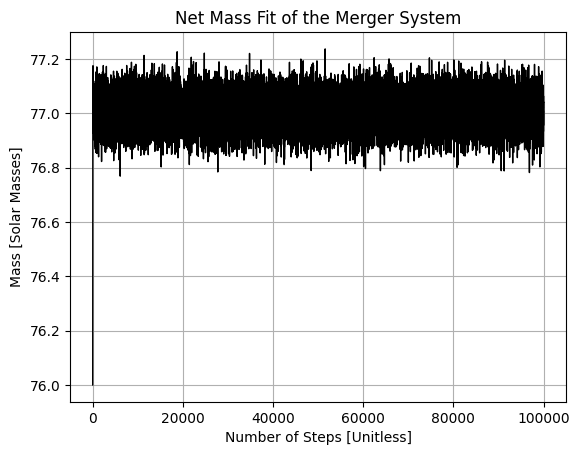

In [35]:
plt.figure(12)
plt.plot(th_c_M, 'k-', lw=1)
plt.xlabel('Number of Steps [Unitless]')
plt.ylabel('Mass [Solar Masses]')
plt.title("Net Mass Fit of the Merger System")
plt.grid()
plt.show()

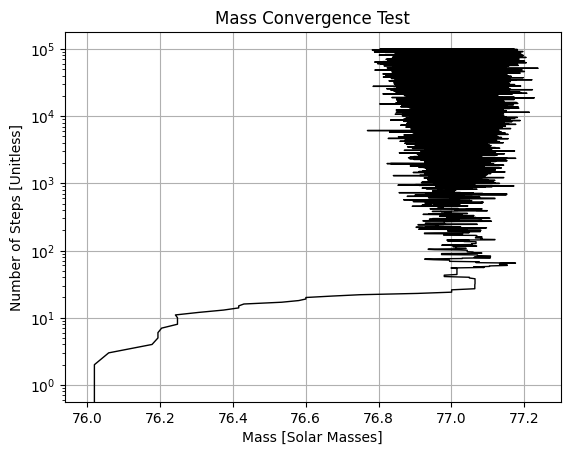

In [36]:
x_mcmc_M = np.linspace(0, steps, steps + 1)

plt.figure()
plt.semilogy(th_c_M, x_mcmc_M, 'k-', lw=1)
plt.xlabel('Mass [Solar Masses]')
plt.ylabel('Number of Steps [Unitless]')
plt.title("Mass Convergence Test")
plt.grid()
plt.show()

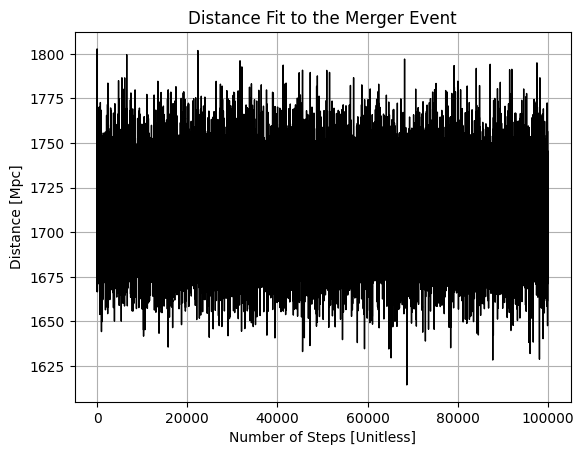

In [38]:
plt.figure(13)
plt.plot(th_c_D, 'k-', lw=1)
plt.xlabel('Number of Steps [Unitless]')
plt.ylabel('Distance [Mpc]')
plt.title("Distance Fit to the Merger Event")
plt.grid()
plt.show()
#comment on the width of the mcmc (error)

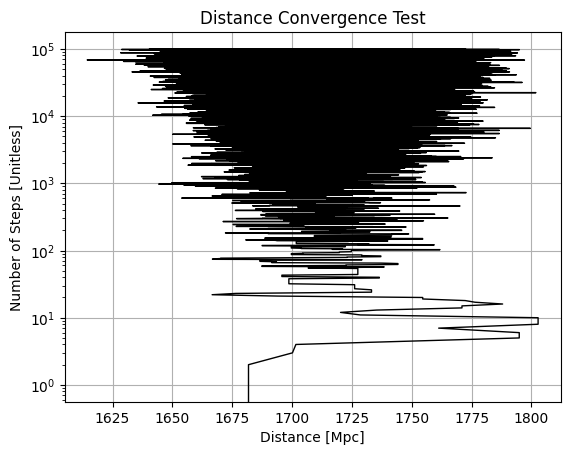

In [39]:
x_mcmc_D = np.linspace(0, steps, steps + 1)

plt.figure()
plt.semilogy(th_c_D, x_mcmc_D, 'k-', lw=1)
plt.xlabel('Distance [Mpc]')
plt.ylabel('Number of Steps [Unitless]')
plt.title("Distance Convergence Test")
plt.grid()
plt.show()

### (3)

In [40]:
burnin_M = 100
brnt_th_M = th_c_M[burnin_M:]

HDI_u_M = np.percentile(brnt_th_M, 95) # upper high density interval
HDI_l_M = np.percentile(brnt_th_M, 5) # lower high denisty interval
M_norm = np.linspace(np.min(brnt_th_M), np.max(brnt_th_M), len(brnt_th_M))
HDI_M = np.linspace(HDI_l_M, HDI_u_M, 10000)

CI_M = ((HDI_u_M - mu_stps_M) + (mu_stps_M - HDI_l_M)) / 2 # error in median of mass [Solar masses]

In [41]:
print(np.percentile(brnt_th_M, 95))
print(np.percentile(brnt_th_M, 5))

77.1033449759686
76.91359127159464


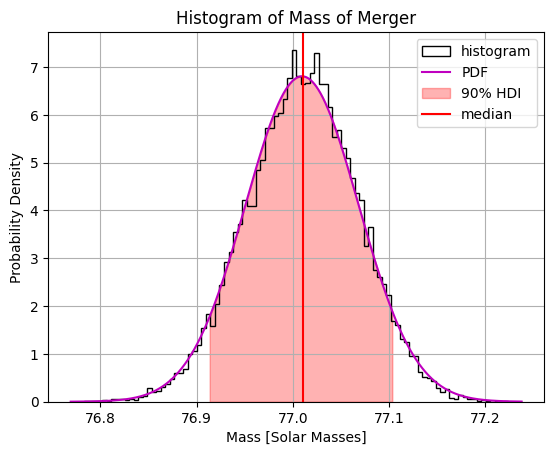

In [42]:
plt.figure()
plt.hist(brnt_th_M, bins=100, density=True, histtype='step', color='black', label='histogram')
plt.plot(M_norm, stats.norm.pdf(M_norm, mu_stps_M, std_M), 'm-', label='PDF')
plt.fill_between(HDI_M, stats.norm.pdf(HDI_M, mu_stps_M, std_M), alpha=0.3, color='r', label = '90% HDI')
plt.axvline(median_M, color='r', label='median')
plt.xlabel('Mass [Solar Masses]')
plt.ylabel('Probability Density')
plt.title("Histogram of Mass of Merger")
plt.legend(loc='best')
plt.grid()
plt.show()

In [43]:
burnin_D = 150
brnt_th_D = th_c_D[burnin_D:]

HDI_u_D = np.percentile(brnt_th_D, 95) # upper high density interval
HDI_l_D = np.percentile(brnt_th_D, 5) # lower high denisty interval
D_norm = np.linspace(np.min(brnt_th_D), np.max(brnt_th_D), len(brnt_th_D))
HDI_D = np.linspace(HDI_l_D, HDI_u_D, 10000)

CI_D = ((HDI_u_D - mu_stps_D) + (mu_stps_D - HDI_l_D)) / 2 # error in median of distance [Mpc]

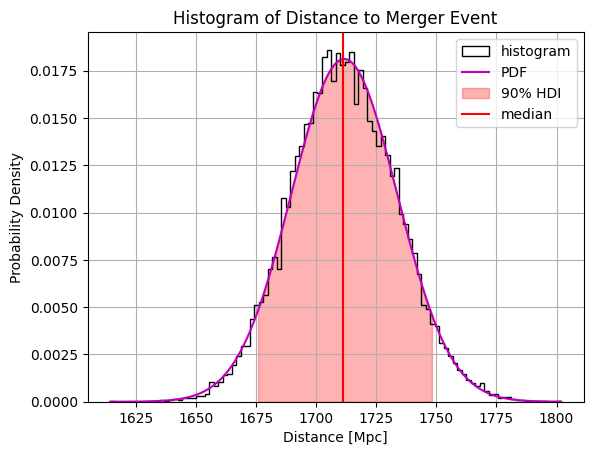

In [44]:
plt.figure()
plt.hist(brnt_th_D, bins=100, density=True, histtype='step', color='black', label='histogram')
plt.plot(D_norm, stats.norm.pdf(D_norm, mu_stps_D, std_D), 'm-', label='PDF')
plt.fill_between(HDI_D, stats.norm.pdf(HDI_D, mu_stps_D, std_D), alpha=0.3, color='r', label = '90% HDI')
plt.axvline(median_D, color='r', label='median')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Probability Density')
plt.title("Histogram of Distance to Merger Event")
plt.legend(loc='best')
plt.grid()
plt.show()

In [45]:
print(HDI_u_D - mu_stps_D)
print(mu_stps_D - HDI_l_D)

36.481381759278065
35.78570917199431


***

## Part F - Putting it all together [36 marks]

**Answer:**

### 1)

In [46]:
M_1 = median_M / 2 #because we're assuming that the two masses are the same, so each mass is equal to the calculated total mass divided by 2
M_2 = median_M / 2

M_ch = ((M_1 * M_2)**(3/5)) / ((M_1 + M_2)**(1/5))
print(M_ch)

33.5207214656488


### 2)

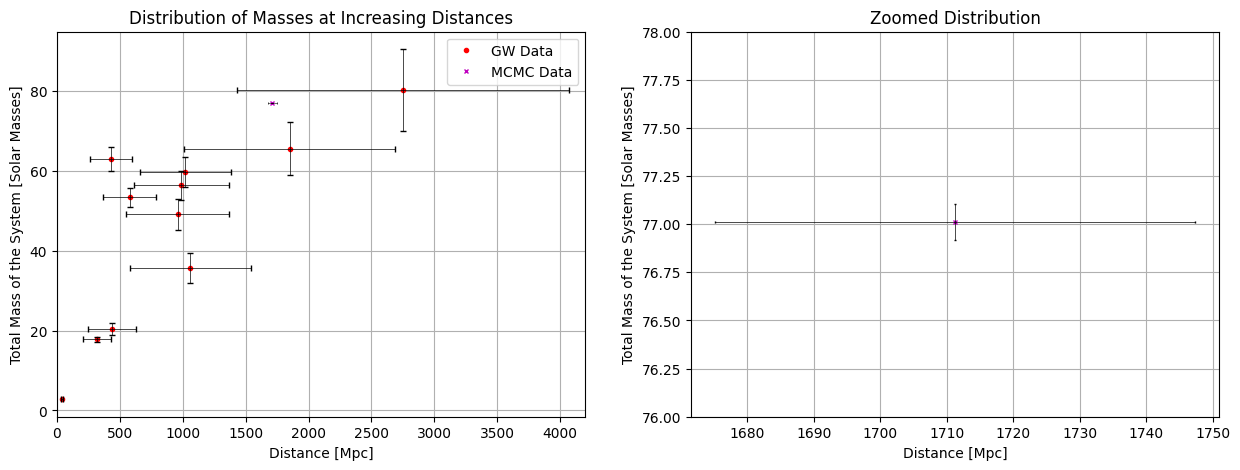

In [47]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(GR['DL'], GR['Mtot'], 'ro', markersize = "3", label='GW Data') # Plotting the observed merger events masses against distance
ax1.errorbar(GR['DL'], GR['Mtot'], xerr=GR['DL_err'], yerr=GR['Mtot_err'], ls='None', ecolor='k', elinewidth=0.5, capsize=2, capthick=1) # Plotting errorbars
ax1.plot(median_D, median_M, 'mx', markersize = "3", label='MCMC Data') # plotting median distance aginst mass for mcmc calculated values (with confidence intervals as errors)
ax1.errorbar(median_D, median_M, xerr=CI_D, yerr=CI_M, ls='None', ecolor='k', elinewidth=0.4, capsize=1, capthick=0.5) # Plotting errorbars
ax1.set_xlabel('Distance [Mpc]')
ax1.set_ylabel('Total Mass of the System [Solar Masses]')
ax1.set_title('Distribution of Masses at Increasing Distances')
ax1.legend(loc='best')
ax1.set_xlim(0, 4200)
ax1.grid()

ax2.plot(median_D, median_M, 'mx', markersize = "3") # plotting median distance aginst mass for mcmc calculated values (with confidence intervals as errors)
ax2.errorbar(median_D, median_M, xerr=CI_D, yerr=CI_M, ls='None', ecolor='k', elinewidth=0.5, capsize=1, capthick=1) # Plotting errorbars
ax2.set_xlabel('Distance [Mpc]')
ax2.set_ylabel('Total Mass of the System [Solar Masses]')
ax2.set_title('Zoomed Distribution')
ax2.set_ylim(76, 78)
ax2.grid()

plt.show()

In [48]:
A = (np.max(O_strain) + np.abs(np.min(O_strain))) / 2 # Peak amplitude (Strain) at time of merger

In [50]:
merg_1 = O_time < 0.015
Merg = O_strain[merg_1] # Applying this selection to strain
t_merg = O_time[merg_1] # Applying this selection to time
merg_2 = t_merg > -0.015
Merg = Merg[merg_2]
t_merg = t_merg[merg_2]

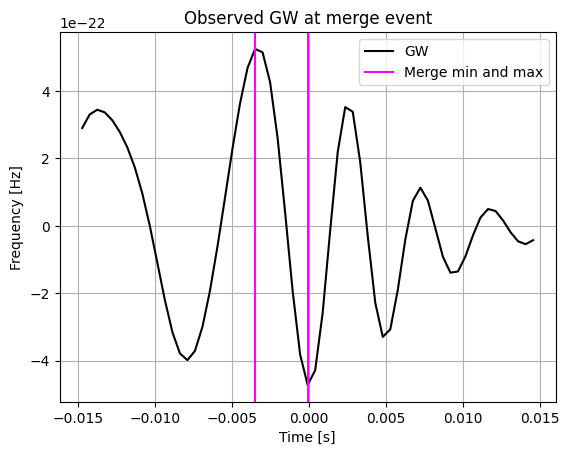

In [51]:
t_at_mrg = O_time[np.argmax(O_strain)] # time of merger
t_aftr_mrg = O_time[np.argmin(O_strain)] # time slightly after merger

plt.figure()
plt.plot(t_merg, Merg, 'k-', label='GW')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title("Observed GW at merge event")
plt.axvline(O_time[np.argmax(O_strain)], color='magenta', label='Merge min and max')
plt.axvline(O_time[np.argmin(O_strain)], color='magenta')
plt.legend(loc='best')
plt.grid()
plt.show()

In [52]:
hlf_T = np.abs(t_at_mrg - t_aftr_mrg)
T = 2*hlf_T # period of Oscillation at the point of merging
freq = 1 / T # frequency at merge event

In [53]:
print(T)
print(freq)

0.0068359375
146.28571428571428


In [54]:
# GW signal for 1 orbit is two wavelength so half of the frequency is the frequency of the gravitational wave
f_gw = freq / 2
angl_frq = 2*np.pi*f_gw

M_1_kg = M_1 * 1.99E30
M_2_kg = M_2 * 1.99E30
G = 6.67E-11
R = ((G * (M_1_kg + M_2_kg)) / (angl_frq**2))**(1/3)
print(R)
r = (2*G*M_1*1.99E30) / (3E8**2)
print(r*2)

364425.05495887523
227151.57305886815


***

## Part G - Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>